In [895]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [896]:
df=pd.read_csv('./Absenteeism_at_work.csv',delimiter=';')

In [897]:
print(df.head())

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0 

In [898]:
print(df.tail())

     ID  Reason for absence  Month of absence  Day of the week  Seasons  \
735  11                  14                 7                3        1   
736   1                  11                 7                3        1   
737   4                   0                 0                3        1   
738   8                   0                 0                4        2   
739  35                   0                 0                6        3   

     Transportation expense  Distance from Residence to Work  Service time  \
735                     289                               36            13   
736                     235                               11            14   
737                     118                               14            13   
738                     231                               35            14   
739                     179                               45            14   

     Age  Work load Average/day   ...  Disciplinary failure  Education  Son  \
7

In [899]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [900]:
print(df.shape)

(740, 21)


In [901]:
v=df[df['Absenteeism time in hours']==0].count()
print(v)

ID                                 44
Reason for absence                 44
Month of absence                   44
Day of the week                    44
Seasons                            44
Transportation expense             44
Distance from Residence to Work    44
Service time                       44
Age                                44
Work load Average/day              44
Hit target                         44
Disciplinary failure               44
Education                          44
Son                                44
Social drinker                     44
Social smoker                      44
Pet                                44
Weight                             44
Height                             44
Body mass index                    44
Absenteeism time in hours          44
dtype: int64


In [902]:
print("% of No Absentees="+str(v[0]/df.shape[0]))

% of No Absentees=0.05945945945945946


In [903]:
df['Absenteeism time in hours'].mean()

6.924324324324324

In [904]:
df['Absenteeism time in hours'].median()

3.0

In [905]:
#Function for defing bar text
def barlabels(bars,c='black'):
    for bar in bars:
        yval = round(bar.get_height(),2)
        plt.text(bar.get_x()+0.25,yval, yval,verticalalignment='bottom',color=c,fontweight='bold')

In [906]:
r= df.groupby('Reason for absence')
r['Absenteeism time in hours'].count()

Reason for absence
0      43
1      16
2       1
3       1
4       2
5       3
6       8
7      15
8       6
9       4
10     25
11     26
12      8
13     55
14     19
15      2
16      3
17      1
18     21
19     40
21      6
22     38
23    149
24      3
25     31
26     33
27     69
28    112
Name: Absenteeism time in hours, dtype: int64

[ 43  16   1   1   2   3   8  15   6   4  25  26   8  55  19   2   3   1
  21  40   6  38 149   3  31  33  69 112]


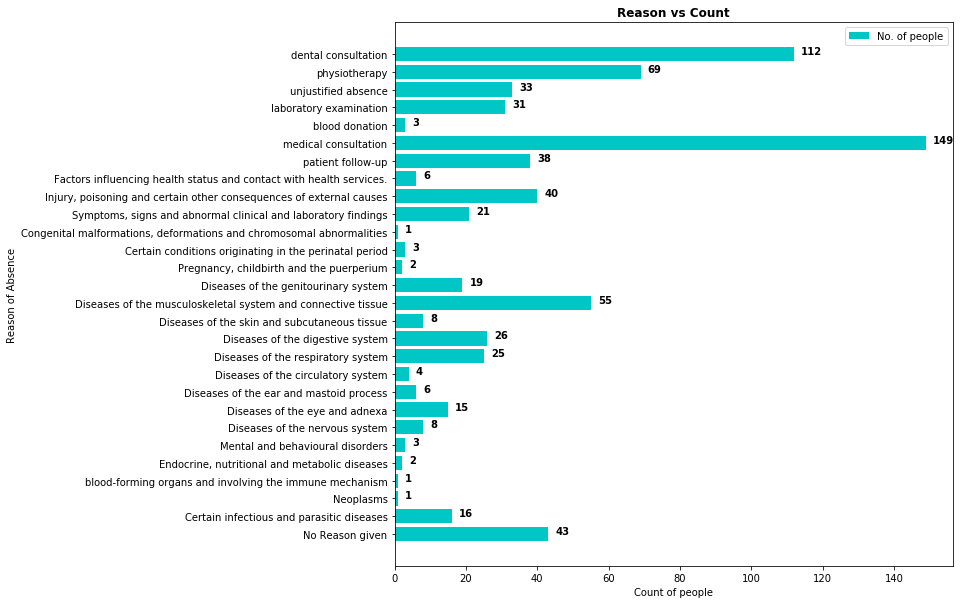

In [907]:
arr=r['Absenteeism time in hours'].count()
arr=np.array(arr)
print(arr)
fig, ax = plt.subplots(figsize=(10,10))
table=[
    'No Reason given','Certain infectious and parasitic diseases', 
'Neoplasms', 
'blood-forming organs and involving the immune mechanism', 
'Endocrine, nutritional and metabolic diseases', 
'Mental and behavioural disorders', 
'Diseases of the nervous system', 
'Diseases of the eye and adnexa', 
'Diseases of the ear and mastoid process', 
'Diseases of the circulatory system', 
'Diseases of the respiratory system', 
'Diseases of the digestive system', 
'Diseases of the skin and subcutaneous tissue', 
'Diseases of the musculoskeletal system and connective tissue', 
'Diseases of the genitourinary system',
'Pregnancy, childbirth and the puerperium',
'Certain conditions originating in the perinatal period',
'Congenital malformations, deformations and chromosomal abnormalities', 
'Symptoms, signs and abnormal clinical and laboratory findings', 
'Injury, poisoning and certain other consequences of external causes', 
'Factors influencing health status and contact with health services.',
'patient follow-up',
'medical consultation',
'blood donation',
'laboratory examination',
'unjustified absence',
'physiotherapy',
'dental consultation']
plt.barh(y=np.arange(len(arr)),width=arr,label='No. of people',color='#00C6C5')
plt.yticks(np.arange(len(arr)),table,rotation=0)
plt.ylabel('Reason of Absence')
plt.xlabel('Count of people')
plt.title('Reason vs Count',fontweight='bold')
plt.legend()
for i, v in enumerate(arr):
    ax.text(v+2, i, str(v), color='black',fontweight='bold')
plt.savefig('./Images/fig0.png')
plt.show()

1. No 20 number cause. XX External causes of morbidity and mortality.
2. 44 people gave No reason for absence.
3. 149 people gave Medical Consultation as the Reason.

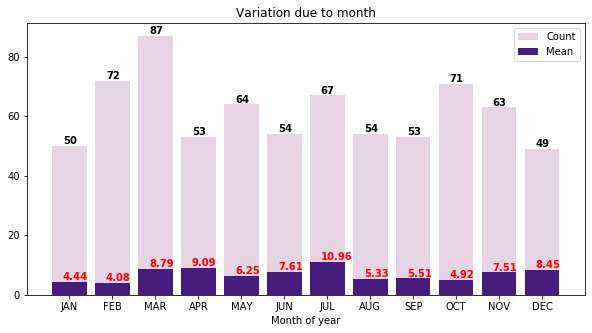

In [908]:
plt.figure(figsize=(10,5))
r= df.groupby('Month of absence')
arr=r['Absenteeism time in hours'].count()
arr=np.array(arr)
arr=arr[1:]
arr1=r['Absenteeism time in hours'].mean()
arr1=np.array(arr1)
arr1=arr1[1:]
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='#E6D3E3',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='#461C7C',label='Mean')
plt.xlabel('Month of year')
plt.xticks(np.arange(len(arr)),['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
plt.title('Variation due to month')
plt.legend()
barlabels(bars)
barlabels(bars1,'red')
plt.savefig('./Images/fig1.png')
plt.show()

In [909]:
r['Absenteeism time in hours'].mean()

Month of absence
0      0.000000
1      4.440000
2      4.083333
3      8.793103
4      9.094340
5      6.250000
6      7.611111
7     10.955224
8      5.333333
9      5.509434
10     4.915493
11     7.507937
12     8.448980
Name: Absenteeism time in hours, dtype: float64

1. 3 People gave No month for absence
2. Most people were absent on March
3. Max time of absence was on July

[161 154 156 125 144]


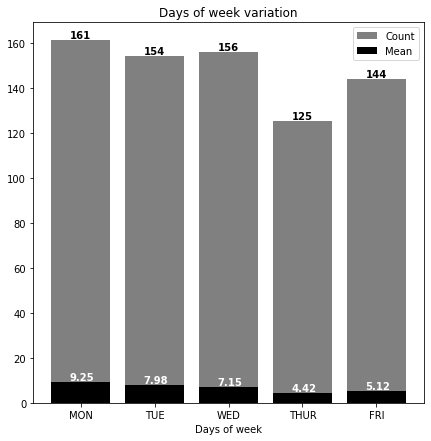

In [910]:
plt.figure(figsize=(7,7))
r= df.groupby('Day of the week')
arr=r['Absenteeism time in hours'].count()
arr=np.array(arr)
print(arr)
arr1=r['Absenteeism time in hours'].mean()
arr1=np.array(arr1)
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='grey',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='k',label='Mean')
plt.xlabel('Days of week')
plt.xticks(np.arange(len(arr)),['MON','TUE','WED','THUR','FRI'])
plt.title('Days of week variation')
plt.legend()
barlabels(bars)
barlabels(bars1,'white')
plt.savefig('./Images/fig2.png')
plt.show()

In [911]:
r['Absenteeism time in hours'].mean()

Day of the week
2    9.248447
3    7.980519
4    7.147436
5    4.424000
6    5.125000
Name: Absenteeism time in hours, dtype: float64

1. Thursday people are less absent
2. Monday most people are absent for longer period of time in hours

[170 192 183 195]


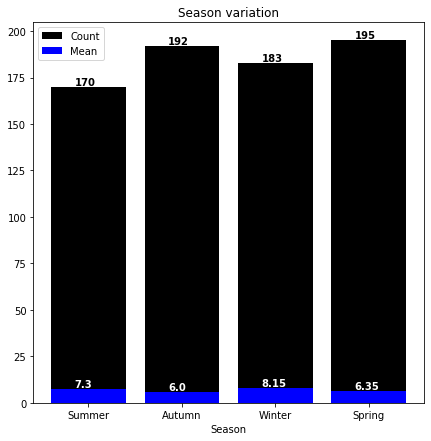

In [912]:
plt.figure(figsize=(7,7))
r= df.groupby('Seasons')
arr=r['Absenteeism time in hours'].count()
arr=np.array(arr)
print(arr)
arr1=r['Absenteeism time in hours'].mean()
arr1=np.array(arr1)
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='k',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='blue',label='Mean')
plt.xlabel('Season')
plt.xticks(np.arange(len(arr)),['Summer','Autumn','Winter','Spring'])
plt.title('Season variation')
plt.legend()
barlabels(bars)
barlabels(bars1,'white')
plt.savefig('./Images/fig3.png')
plt.show()

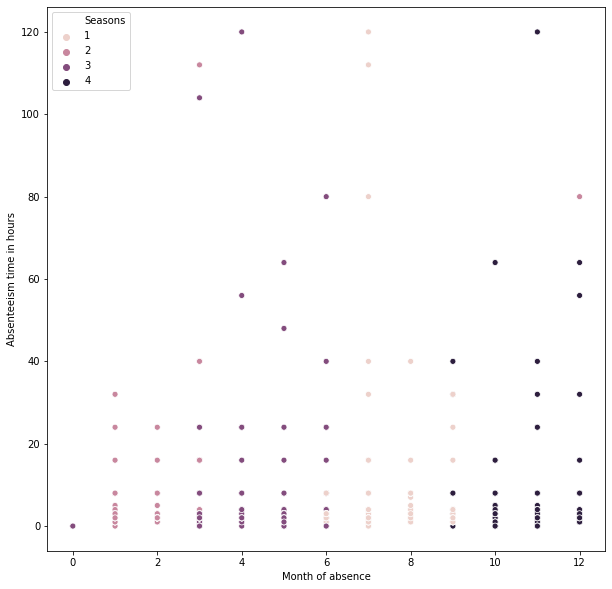

In [913]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Month of absence',y='Absenteeism time in hours',data=df,hue='Seasons')
plt.savefig('./Images/fig17.png')

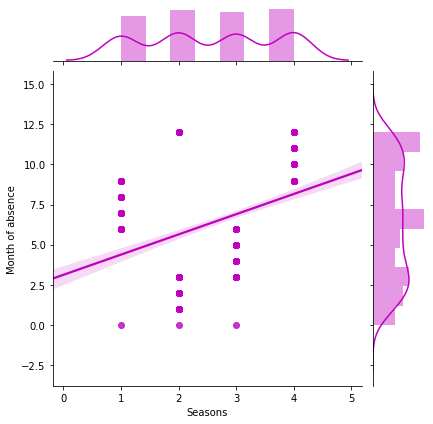

In [914]:
sns.jointplot(x='Seasons',y='Month of absence',data=df,kind='reg',color='m')
plt.savefig('./Images/fig18.png')

In [915]:
r['Absenteeism time in hours'].mean()

Seasons
1    7.300000
2    6.000000
3    8.153005
4    6.353846
Name: Absenteeism time in hours, dtype: float64

In Winter people are most lazy

In [916]:
df['Transportation expense'].mean()

221.32972972972973

In [917]:
df2=df.assign(avg=df['Transportation expense']/df['Distance from Residence to Work'])
#print(df1)

<Figure size 720x720 with 0 Axes>

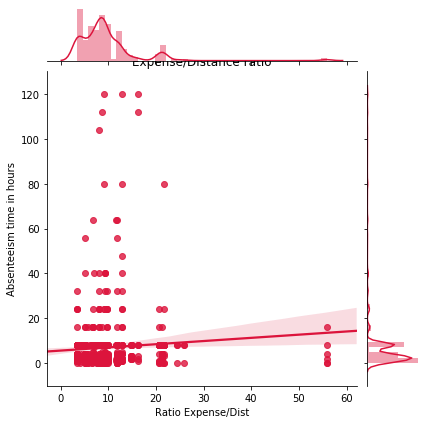

In [918]:
plt.figure(figsize=(10,10))
sns.jointplot(x='avg',y='Absenteeism time in hours',data=df2,kind='reg',color='crimson')
plt.title('Expense/Distance ratio')
plt.xlabel('Ratio Expense/Dist')
plt.savefig('./Images/fig4.png')
plt.show()

In [919]:
errorwindow=0.15
maximum=df2['avg'].max()
minimum=df2['avg'].min()
mean=df2['avg'].mean()
mean1=mean-errorwindow*mean
mean2=mean+errorwindow*mean
bins=list([minimum-1,mean1,mean2,maximum+1])
print(bins)

[2.5098039215686274, 8.117011471215468, 10.981839049291514, 56.8]


In [920]:
df2=df2.assign(avg1=(pd.cut(df2['avg'], bins=bins)))
print(df2['avg1'].value_counts())

(2.51, 8.117]      321
(8.117, 10.982]    223
(10.982, 56.8]     196
Name: avg1, dtype: int64


avg1
(2.51, 8.117]      321
(8.117, 10.982]    223
(10.982, 56.8]     196
Name: Absenteeism time in hours, dtype: int64
avg1
(2.51, 8.117]      6.056075
(8.117, 10.982]    6.116592
(10.982, 56.8]     9.265306
Name: Absenteeism time in hours, dtype: float64


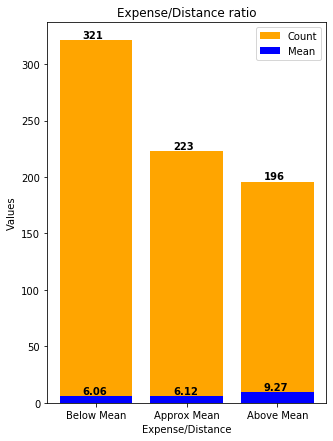

In [921]:
plt.figure(figsize=(5,7))
r= df2.groupby('avg1')
arr=r['Absenteeism time in hours'].count()
arr1=r['Absenteeism time in hours'].mean()
print(arr)
print(arr1)
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='orange',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='blue',label='Mean')
plt.xlabel('Expense/Distance')
plt.ylabel('Values')
plt.xticks(np.arange(len(arr)),['Below Mean','Approx Mean','Above Mean'])
plt.title('Expense/Distance ratio')
plt.legend()
barlabels(bars)
barlabels(bars1)
plt.savefig('./Images/fig5.png')
plt.show()

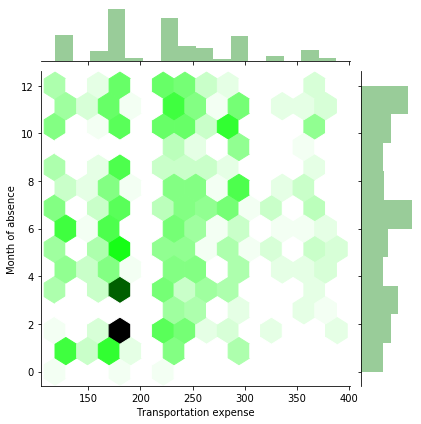

In [922]:
sns.jointplot(x='Transportation expense',y='Month of absence',data=df,kind='hex',color='green')
plt.savefig('./Images/fig19.png')

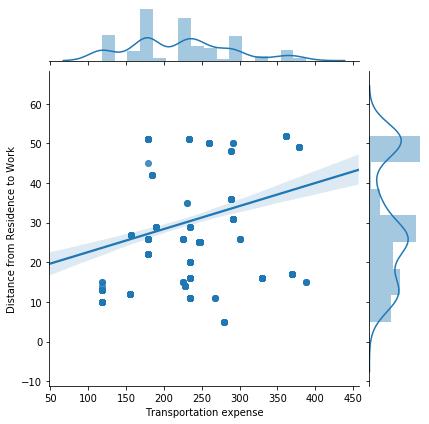

In [923]:
sns.jointplot(x='Transportation expense',y='Distance from Residence to Work',kind='reg',data=df)
plt.savefig('./Images/fig20.png')

Randomness found

In [924]:
r= df.groupby('Distance from Residence to Work')
r['Absenteeism time in hours'].count()
#r['Absenteeism time in hours'].median()

Distance from Residence to Work
5       6
10     55
11     26
12     29
13     34
14      9
15      9
16     26
17     15
20     19
22     20
25     54
26    128
27      7
29     14
31     37
35      2
36     40
42      7
45      1
48      5
49      8
50     45
51    120
52     24
Name: Absenteeism time in hours, dtype: int64

In [925]:
maximum=df['Distance from Residence to Work'].max()
minimum=df['Distance from Residence to Work'].min()
bins=list(np.linspace(minimum-1,maximum+1,num=8))
print(bins)

[4.0, 11.0, 18.0, 25.0, 32.0, 39.0, 46.0, 53.0]


In [926]:
df1=df.assign(dist=pd.cut(df['Distance from Residence to Work'], bins=bins))
print(df1['dist'].value_counts())

(46.0, 53.0]    202
(25.0, 32.0]    186
(11.0, 18.0]    122
(18.0, 25.0]     93
(4.0, 11.0]      87
(32.0, 39.0]     42
(39.0, 46.0]      8
Name: dist, dtype: int64


dist
(4.0, 11.0]      5.873563
(11.0, 18.0]    11.844262
(18.0, 25.0]     5.989247
(25.0, 32.0]     5.720430
(32.0, 39.0]    10.714286
(39.0, 46.0]     3.375000
(46.0, 53.0]     5.297030
Name: Absenteeism time in hours, dtype: float64


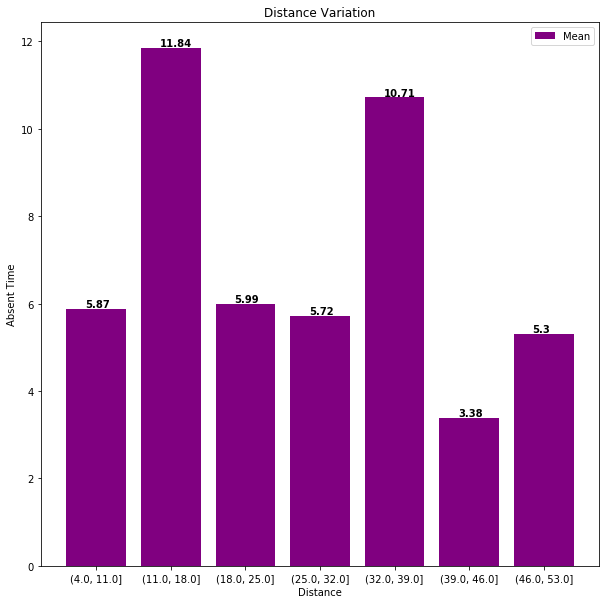

In [927]:
plt.figure(figsize=(10,10))
r= df1.groupby('dist')
arr=r['Absenteeism time in hours'].mean()
print(arr)
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='purple',label='Mean')
plt.xlabel('Distance')
plt.ylabel('Absent Time')
z=list(arr.index)
plt.xticks(np.arange(len(z)),z)
plt.title('Distance Variation')
plt.legend()
barlabels(bars)
plt.savefig('./Images/fig6.png')
plt.show()

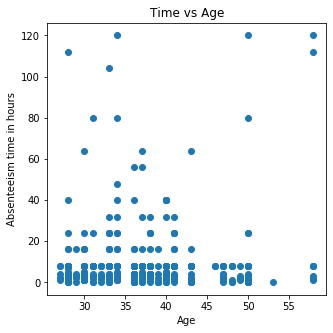

In [928]:
plt.figure(figsize=(5,5))
plt.scatter(x=df['Age'],y=df['Absenteeism time in hours'])
plt.ylabel('Absenteeism time in hours')
plt.xlabel('Age')
plt.title('Time vs Age')
plt.savefig('./Images/fig7.png')
plt.show()

In [929]:
maximum=df['Age'].max()
minimum=df['Age'].min()
bins=list(np.linspace(minimum-1,maximum+1,num=7))
print(bins)

[26.0, 31.5, 37.0, 42.5, 48.0, 53.5, 59.0]


In [930]:
df1=df.assign(age=pd.cut(df['Age'], bins=bins))
print(df1['age'].value_counts())

(31.5, 37.0]    221
(37.0, 42.5]    213
(26.0, 31.5]    199
(42.5, 48.0]     56
(48.0, 53.5]     43
(53.5, 59.0]      8
Name: age, dtype: int64


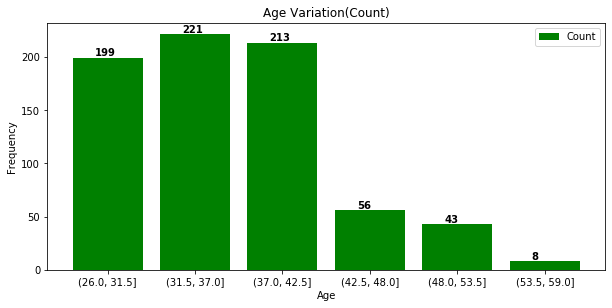

age
(26.0, 31.5]     5.924623
(31.5, 37.0]     8.475113
(37.0, 42.5]     5.474178
(42.5, 48.0]     5.375000
(48.0, 53.5]     7.976744
(53.5, 59.0]    32.750000
Name: Absenteeism time in hours, dtype: float64


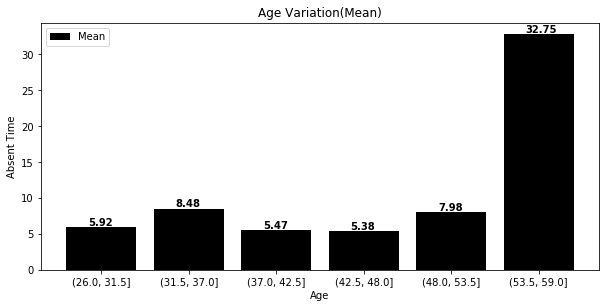

In [931]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
r= df1.groupby('age')
arr=r['Absenteeism time in hours'].count()
#arr=np.array(arr)
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='green',label='Count')
plt.xlabel('Age')
plt.ylabel('Frequency')
z=list(arr.index)
plt.xticks(np.arange(len(z)),z)
plt.title('Age Variation(Count)')
plt.legend()
barlabels(bars)
plt.savefig('./Images/fig8.png')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
arr1=r['Absenteeism time in hours'].mean()
print(arr1)
bars=plt.bar(x=np.arange(len(arr)),height=arr1,color='black',label='Mean')
plt.xlabel('Age')
plt.ylabel('Absent Time')
z=list(arr.index)
plt.xticks(np.arange(len(z)),z)
plt.title('Age Variation(Mean)')
plt.legend()
barlabels(bars)
plt.savefig('./Images/fig9.png')
plt.show()

<Figure size 864x432 with 0 Axes>

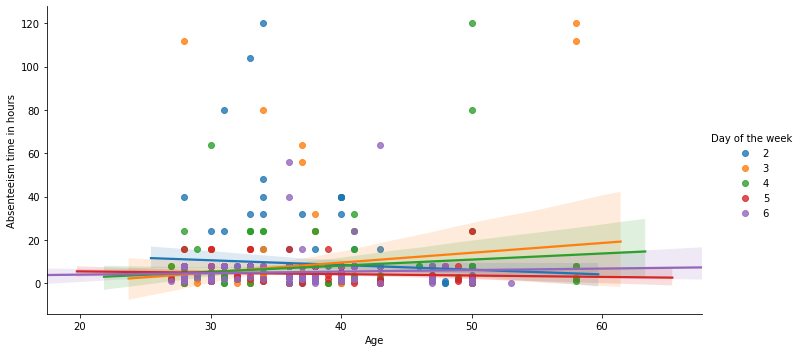

In [932]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeism time in hours',data=df,hue='Day of the week',height=5,aspect=2)
plt.savefig('./Images/fig22.png')

In [933]:
#plt.figure(figsize=(5,5))
r= df.groupby('Work load Average/day ')
arr=r['Absenteeism time in hours'].count()
arr=np.array(arr)
print(arr)

[21 36 20 19 32 13 19 22 22 16 20 15 21 18 19 15 12 33 12 28 18 23  3 19
 16 15 22 25 19 18 18 24 15 20 11 29 16 16]


In [934]:
r['Absenteeism time in hours'].count()

Work load Average/day 
205.917    21
222.196    36
230.290    20
236.629    19
237.656    32
239.409    13
239.554    19
241.476    22
244.387    22
246.074    16
246.288    20
249.797    15
251.818    21
253.465    18
253.957    19
261.306    15
261.756    12
264.249    33
264.604    12
265.017    28
265.615    18
268.519    23
271.219     3
275.089    19
275.312    16
280.549    15
284.031    22
284.853    25
294.217    19
302.585    18
306.345    18
308.593    24
313.532    15
326.452    20
330.061    11
343.253    29
377.550    16
378.884    16
Name: Absenteeism time in hours, dtype: int64

In [935]:
r['Absenteeism time in hours'].mean()

Work load Average/day 
205.917     6.666667
222.196     9.916667
230.290    10.200000
236.629     3.631579
237.656     7.312500
239.409    13.384615
239.554     6.789474
241.476     4.000000
244.387     5.772727
246.074     4.687500
246.288     5.700000
249.797     5.066667
251.818     5.047619
253.465     4.111111
253.957     6.421053
261.306    11.800000
261.756     3.416667
264.249     3.060606
264.604    22.000000
265.017     6.285714
265.615     4.000000
268.519     4.652174
271.219     0.000000
275.089     5.157895
275.312     8.562500
280.549    11.200000
284.031     9.318182
284.853     3.960000
294.217     8.578947
302.585     4.833333
306.345     8.944444
308.593     2.500000
313.532     5.866667
326.452     9.700000
330.061     6.727273
343.253     9.689655
377.550    11.937500
378.884     5.687500
Name: Absenteeism time in hours, dtype: float64

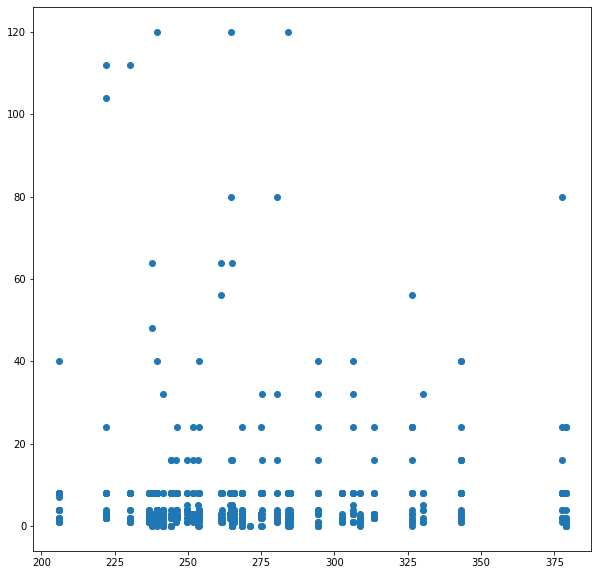

In [936]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['Work load Average/day '],y=df['Absenteeism time in hours'])


In [937]:
r= df.groupby('Pet')
r['Absenteeism time in hours'].count()

Pet
0    460
1    138
2     96
4     32
5      6
8      8
Name: Absenteeism time in hours, dtype: int64

In [938]:
r= df.groupby('Social drinker')
arr1=r['Absenteeism time in hours'].count()
print(arr1)

Social drinker
0    320
1    420
Name: Absenteeism time in hours, dtype: int64


In [939]:
r['Absenteeism time in hours'].mean()

Social drinker
0    5.931250
1    7.680952
Name: Absenteeism time in hours, dtype: float64

In [940]:
r= df.groupby('Social smoker')
arr2=r['Absenteeism time in hours'].count()
print(arr2)

Social smoker
0    686
1     54
Name: Absenteeism time in hours, dtype: int64


In [941]:
r['Absenteeism time in hours'].mean()

Social smoker
0    6.957726
1    6.500000
Name: Absenteeism time in hours, dtype: float64

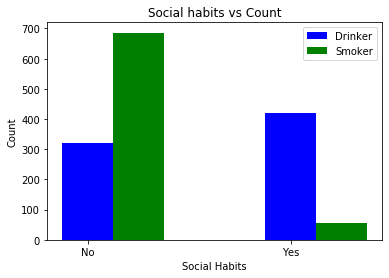

In [942]:
arr1=np.array(arr1)
arr2=np.array(arr2)
X=np.arange(len(arr1))
bars=plt.bar(X + 0.00,height=arr1,color = 'b',width = 0.25,label='Drinker')
bars1=plt.bar(X + 0.25,height=arr2,color = 'g',width = 0.25,label='Smoker')
plt.xticks(np.arange(len(arr1)),['No','Yes'])
plt.xlabel('Social Habits')
plt.ylabel('Count')
plt.title('Social habits vs Count')
plt.legend()
plt.show()

In [943]:
z1=df[(df['Social drinker']==0) & (df['Social smoker']==0)]
z2=df[(df['Social drinker']==1) & (df['Social smoker']==0)]
z3=df[(df['Social drinker']==0) & (df['Social smoker']==1)]
z4=df[(df['Social drinker']==1) & (df['Social smoker']==1)]

[5.968531468531468, 7.665, 5.617647058823529, 8.0]
[286, 400, 34, 20]


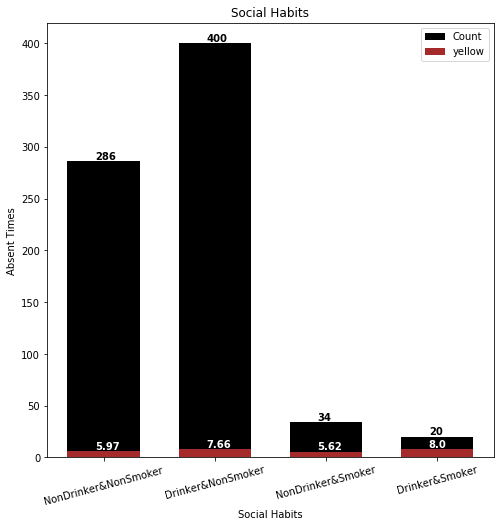

In [944]:
plt.figure(figsize=(8,8))
arr=list([z1['Absenteeism time in hours'].mean(),z2['Absenteeism time in hours'].mean(),z3['Absenteeism time in hours'].mean(),z4['Absenteeism time in hours'].mean()])
arr1=list([z1['Absenteeism time in hours'].count(),z2['Absenteeism time in hours'].count(),z3['Absenteeism time in hours'].count(),z4['Absenteeism time in hours'].count()])
print(arr)
print(arr1)
bars=plt.bar(x=np.arange(len(arr)),height=arr1,color='black',label='Count',width=0.65)
bars1=plt.bar(x=np.arange(len(arr)),height=arr,color='brown',label='yellow',width=0.65)
plt.xlabel('Social Habits')
plt.ylabel('Absent Times')
plt.title('Social Habits')
plt.xticks(np.arange(len(arr)),['NonDrinker&NonSmoker','Drinker&NonSmoker','NonDrinker&Smoker','Drinker&Smoker'],rotation=15)
plt.legend()
barlabels(bars)
barlabels(bars1,'white')
plt.savefig('./Images/fig10.png')
plt.show()

In [945]:
r= df.groupby('Disciplinary failure')
r['Absenteeism time in hours'].count()

Disciplinary failure
0    700
1     40
Name: Absenteeism time in hours, dtype: int64

In [946]:
r['Absenteeism time in hours'].mean()

Disciplinary failure
0    7.32
1    0.00
Name: Absenteeism time in hours, dtype: float64

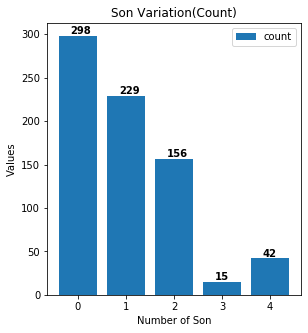

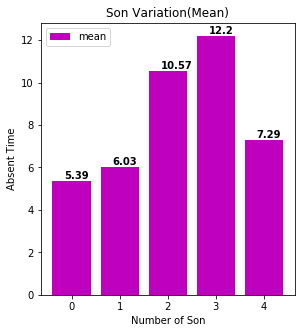

In [947]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
r= df.groupby('Son')
arr=r['Absenteeism time in hours'].count()
arr=np.array(arr)
bars=plt.bar(np.arange(len(arr)),height=arr,label='count')
plt.xlabel('Number of Son')
plt.ylabel('Values')
plt.title('Son Variation(Count)')
plt.legend()
barlabels(bars)
plt.savefig('./Images/fig11.png')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
arr1=r['Absenteeism time in hours'].mean()
arr1=np.array(arr1)
bars=plt.bar(np.arange(len(arr)),height=arr1,label='mean',color='m')
plt.xlabel('Number of Son')
plt.ylabel('Absent Time')
plt.title('Son Variation(Mean)')
plt.legend()
barlabels(bars)
plt.savefig('./Images/fig12.png')
plt.show()


Text(0.5, 0, 'Absent Time')

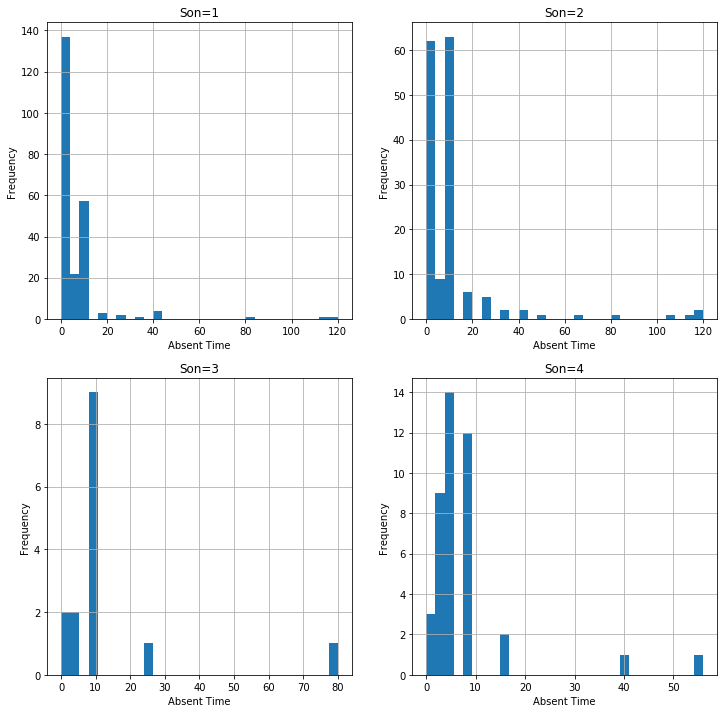

In [948]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
df[df['Son']==1]['Absenteeism time in hours'].plot.hist(title='Son=1',bins=30,grid=True)
plt.xlabel('Absent Time')
plt.subplot(2,2,2)
df[df['Son']==2]['Absenteeism time in hours'].plot.hist(title='Son=2',bins=30,grid=True)
plt.xlabel('Absent Time')
plt.subplot(2,2,3)
df[df['Son']==3]['Absenteeism time in hours'].plot.hist(title='Son=3',bins=30,grid=True)
plt.xlabel('Absent Time')
plt.subplot(2,2,4)
df[df['Son']==4]['Absenteeism time in hours'].plot.hist(title='Son=4',bins=30,grid=True)
plt.xlabel('Absent Time')

Text(0.5, 0, 'Absent Time')

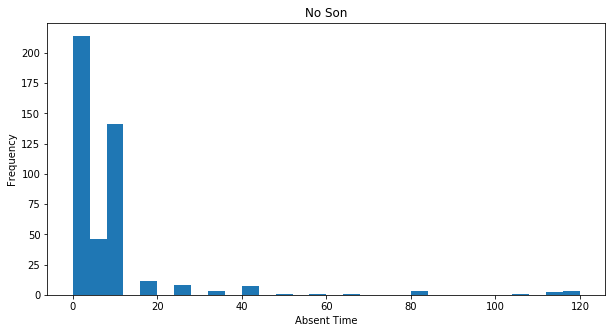

In [949]:
plt.figure(figsize=(10,5))
df[df['Son']!=0]['Absenteeism time in hours'].plot.hist(title='No Son',bins=30)
plt.xlabel('Absent Time')

Text(0.5, 0, 'Absent Time')

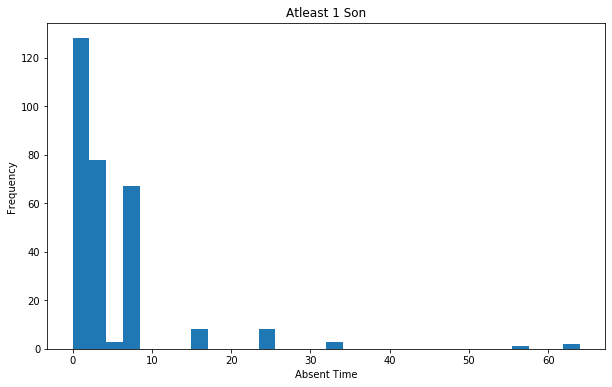

In [950]:
plt.figure(figsize=(10,6))
df[df['Son']==0]['Absenteeism time in hours'].plot.hist(title='Atleast 1 Son',bins=30)
plt.xlabel('Absent Time')

Top time of absence for 0 son is 60 hrs while more than 0 is 120

In [951]:
r= df.groupby('Son')
r['Absenteeism time in hours'].count()

Son
0    298
1    229
2    156
3     15
4     42
Name: Absenteeism time in hours, dtype: int64

In [952]:
r['Age'].mean()

Son
0    35.869128
1    36.131004
2    38.673077
3    31.000000
4    36.000000
Name: Age, dtype: float64

In [953]:
r['Absenteeism time in hours'].mean()

Son
0     5.385906
1     6.030568
2    10.570513
3    12.200000
4     7.285714
Name: Absenteeism time in hours, dtype: float64

In [954]:
maximum=df['Service time'].max()
minimum=df['Service time'].min()
bins=list(np.linspace(minimum-1,19,num=6))
print(bins)

[0.0, 3.8, 7.6, 11.399999999999999, 15.2, 19.0]


In [955]:
df1=df.assign(st=pd.cut(df['Service time'], bins=bins))
print(df1['st'].value_counts())

(7.6, 11.4]     244
(11.4, 15.2]    223
(15.2, 19.0]    205
(0.0, 3.8]       31
(3.8, 7.6]       30
Name: st, dtype: int64


st
(0.0, 3.8]       31
(3.8, 7.6]       30
(7.6, 11.4]     244
(11.4, 15.2]    223
(15.2, 19.0]    205
Name: Absenteeism time in hours, dtype: int64


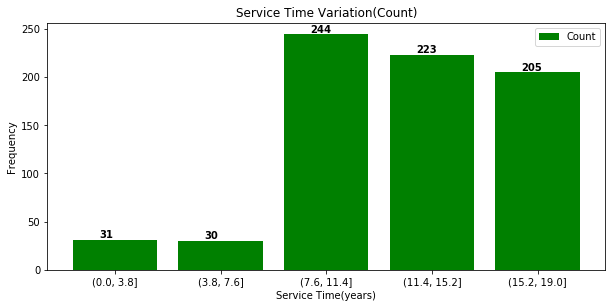

st
(0.0, 3.8]      7.096774
(3.8, 7.6]      5.866667
(7.6, 11.4]     5.590164
(11.4, 15.2]    8.506726
(15.2, 19.0]    7.000000
Name: Absenteeism time in hours, dtype: float64


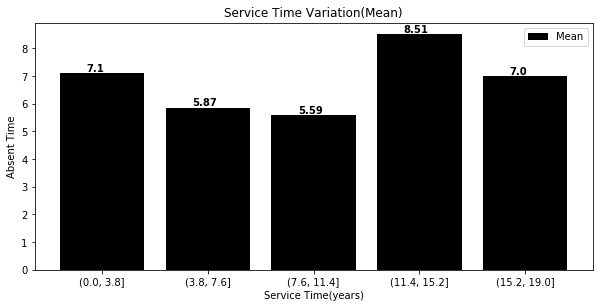

In [956]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
r= df1.groupby('st')
arr=r['Absenteeism time in hours'].count()
print(arr)
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='green',label='Count')
plt.xlabel('Service Time(years)')
plt.ylabel('Frequency')
z=list(arr.index)
plt.xticks(np.arange(len(z)),z)
plt.title('Service Time Variation(Count)')
plt.legend()
barlabels(bars)
plt.savefig('./Images/fig13.png')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
arr1=r['Absenteeism time in hours'].mean()
print(arr1)
bars=plt.bar(x=np.arange(len(arr)),height=arr1,color='black',label='Mean')
plt.xlabel('Service Time(years)')
plt.ylabel('Absent Time')
z=list(arr.index)
plt.xticks(np.arange(len(z)),z)
plt.title('Service Time Variation(Mean)')
plt.legend()
barlabels(bars)
plt.savefig('./Images/fig14.png')
plt.show()

In [957]:
r= df.groupby('Education')
r['Absenteeism time in hours'].count()

Education
1    611
2     46
3     79
4      4
Name: Absenteeism time in hours, dtype: int64

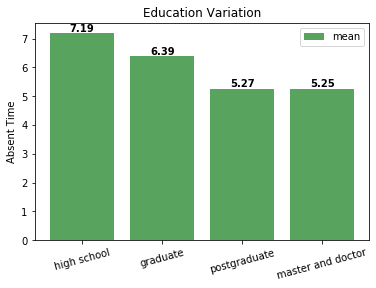

In [958]:
arr1=r['Absenteeism time in hours'].mean()
arr1=np.array(arr1)
bars=plt.bar(np.arange(len(arr1)),height=arr1,label='mean',color='#58A45E')
plt.ylabel('Absent Time')
plt.title('Education Variation')
plt.xticks(np.arange(len(arr1)),['high school', 'graduate', 'postgraduate', 'master and doctor'],rotation=15)
plt.legend()
barlabels(bars)
plt.savefig('./Images/fig15.png')
plt.show()

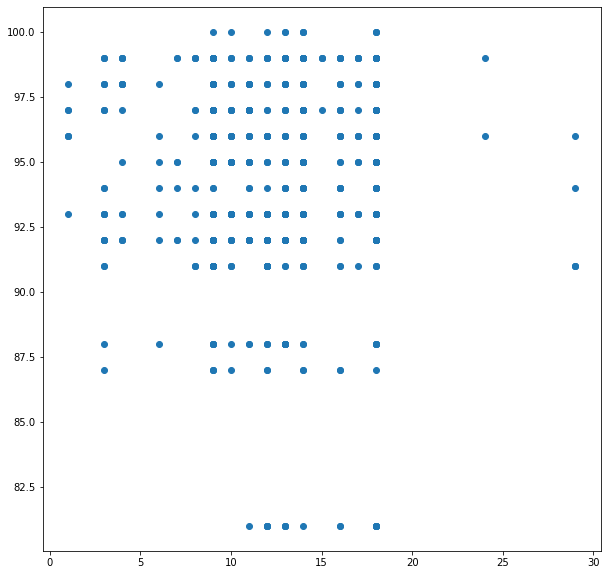

In [959]:
plt.figure(figsize=(10,10))
plt.scatter(y=df['Hit target'],x=df['Service time'])

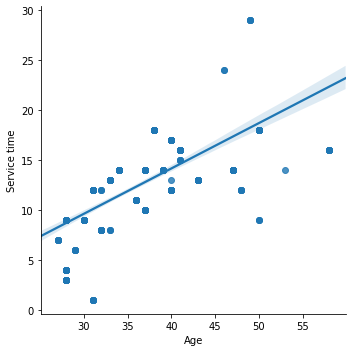

In [960]:
sns.lmplot(x='Age',y='Service time',data=df)
plt.savefig('./Images/fig21.png')

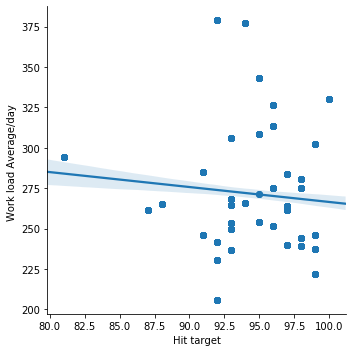

In [961]:
sns.lmplot(x='Hit target',y='Work load Average/day ',data=df)

In [962]:
bins=list([0,18.4,24.9,29.9,39.9])
print(bins)

[0, 18.4, 24.9, 29.9, 39.9]


In [963]:
df1=df.assign(bmi=pd.cut(df['Body mass index'], bins=bins))
print(df1['bmi'].value_counts())

(18.4, 24.9]    264
(29.9, 39.9]    244
(24.9, 29.9]    232
(0.0, 18.4]       0
Name: bmi, dtype: int64


posx and posy should be finite values


bmi
(0.0, 18.4]       0
(18.4, 24.9]    264
(24.9, 29.9]    232
(29.9, 39.9]    244
Name: Absenteeism time in hours, dtype: int64
bmi
(0.0, 18.4]          NaN
(18.4, 24.9]    6.560606
(24.9, 29.9]    8.323276
(29.9, 39.9]    5.987705
Name: Absenteeism time in hours, dtype: float64


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


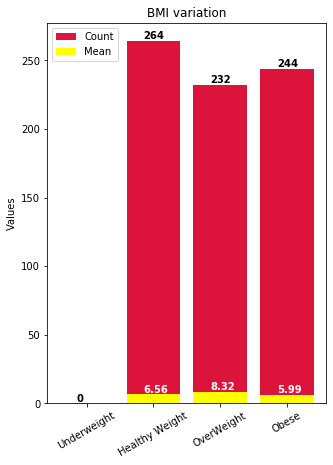

In [964]:
plt.figure(figsize=(5,7))
r= df1.groupby('bmi')
arr=r['Absenteeism time in hours'].count()
arr1=r['Absenteeism time in hours'].mean()
print(arr)
print(arr1)
bars=plt.bar(x=np.arange(len(arr)),height=arr,color='crimson',label='Count')
bars1=plt.bar(x=np.arange(len(arr)),height=arr1,color='yellow',label='Mean')
plt.ylabel('Values')
plt.xticks(np.arange(len(arr)),['Underweight','Healthy Weight','OverWeight','Obese'],rotation=30)
plt.title('BMI variation')
plt.legend(loc='upper left')
barlabels(bars)
barlabels(bars1,'white')
plt.savefig('./Images/fig16.png')
plt.show()

In [965]:

z=df[df['Body mass index']>=29.9]

In [966]:
print(df['Transportation expense'].mean())
print(z['Transportation expense'].mean())

221.32972972972973
203.4877049180328


In [967]:
print(df['Distance from Residence to Work'].mean())
print(z['Distance from Residence to Work'].mean())

29.63108108108108
37.38934426229508


In [968]:
z1=df2[df2['Body mass index']>=29.9]
print(df2['avg'].mean())
print(z1['avg'].mean())

9.549425260253491
6.508269535303941


In [969]:
print(z['Reason for absence'].value_counts())

23    50
27    38
28    34
13    23
0     20
26    18
19    12
18     7
11     7
14     7
22     6
25     4
10     4
24     3
21     2
6      2
5      2
1      2
12     1
7      1
4      1
Name: Reason for absence, dtype: int64


Total 44 people gave no reason for absence out of which 20 are obese.

In [970]:
z2=df[df['Pet']==0]

In [971]:
print(z2['Transportation expense'].mean())

195.88260869565218


In [972]:
z3=df[df['Pet']>0]

In [973]:
print(z3['Transportation expense'].mean())

263.1357142857143


In [974]:
z1=df[df['Seasons']==1]
z2=df[df['Seasons']==2]
z3=df[df['Seasons']==3]
z4=df[df['Seasons']==4]

In [975]:
print(df['Transportation expense'].mean())
print(z1['Transportation expense'].mean())
print(z2['Transportation expense'].mean())
print(z3['Transportation expense'].mean())
print(z4['Transportation expense'].mean())

221.32972972972973
228.51176470588234
207.93229166666666
218.30601092896174
231.0974358974359


In [976]:
#z1=df[(df['Social drinker']==0) & (df['Social smoker']==0)]
z2=df[(df['Social drinker']==1) & (df['Social smoker']>=0)]
#z3=df[(df['Social drinker']==0) & (df['Social smoker']==1)]
#z4=df[(df['Social drinker']==1) & (df['Social smoker']==1)]

In [977]:
#print(df['Son'].value_counts())
#print(z1['Son'].value_counts())
print(z2['Son'].value_counts())
#print(z3['Son'].value_counts())
#print(z4['Son'].value_counts())

0    153
1    122
2     88
4     42
3     15
Name: Son, dtype: int64


In [978]:
print(z2['Age'].mean())
print(z2['Transportation expense'].mean())

37.654761904761905
229.8047619047619


In [979]:
z3=df[(df['Social drinker']==1) & (df['Social smoker']>=0) & (df['Son']<=1)]
print(z3['Transportation expense'].mean())
print(z3['Age'].mean())
print(z3['Service time'].mean())
print(z3['Absenteeism time in hours'].mean())

215.40363636363637
39.087272727272726
14.498181818181818
6.04


In [980]:
z3=df[(df['Social drinker']==1) & (df['Social smoker']>=0) & (df['Son']>1)]
print(z3['Transportation expense'].mean())
print(z3['Age'].mean())
print(z3['Service time'].mean())
print(z3['Absenteeism time in hours'].mean())

257.11724137931037
34.93793103448276
12.779310344827586
10.793103448275861


In [981]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')